The MLP Classifier model has given Accuracy of: 93.333%
Predictions: [1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 1 2 2 2 0 0]


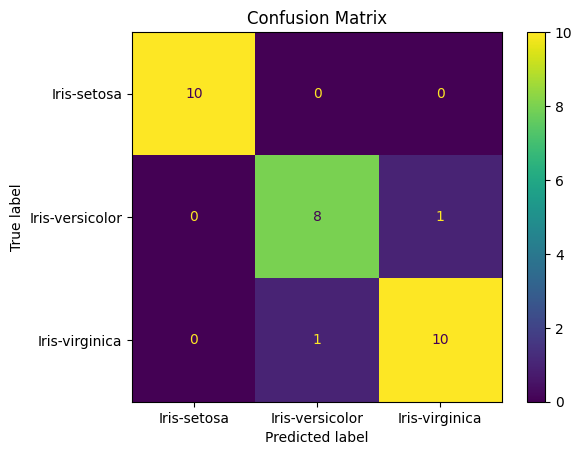

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Load the dataset (Iris dataset)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
data = pd.read_csv(url, names=columns)

# Prepare the input and output
X = data.iloc[:, :-1].values  # Features (all except 'Species')
Y = data.iloc[:, -1].values    # Target ('Species')

# Encode target labels to integers
Y = pd.factorize(Y)[0]  # Convert species names to integers

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the MLP classifier (Backpropagation)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, Y_train)

# Model accuracy
result = mlp_classifier.score(X_test, Y_test)
print("The MLP Classifier model has given Accuracy of: %.3f%%" % (result * 100.0))

# Make predictions on the test set
Y_pred = mlp_classifier.predict(X_test)
print("Predictions:", Y_pred)

# Confusion Matrix
cf_mtrx = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_mtrx, display_labels=data['Species'].unique())
cm_display.plot()
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(Y_test, Y_pred, target_names=data['Species'].unique()))
